In [1]:
#ilgili kütüphanelerin projeye eklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([0, 20, 40, 100, 100, 100, 80, 60,  0,  0,
              40, 40, 60, 50, 30, 90, 10, 20, 60, 80,20,40,10])
y = np.array([0,  0,  10,   0,  30,  50, 50, 50, 50, 20,
              20, 30, 20, 25, 10, 15, 30, 40, 40, 40,80,50,70])

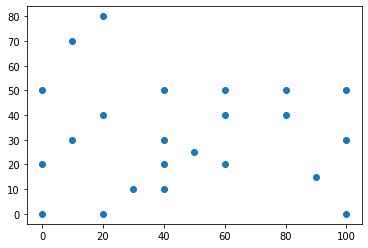

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
#şehir sayısı grafikteki noktalar ile belirtilmiştir
m = len(x)

#(popülasyondaki kromozom sayısı)
n = 100

#(maksimum nesil sayısı)
N = 200

In [5]:
# distance matrix (uzaklık matrisinin hesaplanması)
d = np.array([np.sqrt((x[i] - x)**2 + (y[i] - y)**2) for i in range(m)])
print(d)

[[  0.          20.          41.23105626 100.         104.40306509
  111.80339887  94.33981132  78.10249676  50.          20.
   44.72135955  50.          63.2455532   55.90169944  31.6227766
   91.24143795  31.6227766   44.72135955  72.11102551  89.4427191
   82.46211251  64.03124237  70.71067812]
 [ 20.           0.          22.36067977  80.          85.44003745
   94.33981132  78.10249676  64.03124237  53.85164807  28.28427125
   28.28427125  36.05551275  44.72135955  39.05124838  14.14213562
   71.58910532  31.6227766   40.          56.56854249  72.11102551
   80.          53.85164807  70.71067812]
 [ 41.23105626  22.36067977   0.          60.8276253   63.2455532
   72.11102551  56.56854249  44.72135955  56.56854249  41.23105626
   10.          20.          22.36067977  18.02775638  10.
   50.24937811  36.05551275  36.05551275  36.05551275  50.
   72.80109889  40.          67.08203932]
 [100.          80.          60.8276253    0.          30.
   50.          53.85164807  64.031242

In [ ]:
#random fonksiyonunu kullanarak kromozom saysı kadar elemanlarının sayısı şehirler kadar olan bir popülasyon oluşturulmuştur. 

In [6]:
#popülasyonun oluşturulması fonksiyonu
def createPopulation():   
    pop = [np.random.permutation(m) for i in range(n)]
    pop = pd.DataFrame(pop)
    return pop

In [7]:
#fitness fonksiyonunun (amaç fonksiyonunun) tanımlanması
def fitness(pop):  
    fitness = np.zeros(n, dtype=int)
    for k in range(n):
        a = pop.loc[k]
        b = d[a[m-1], a[0]]
        b += sum([d[a[i], a[i+1]] for i in range(m-1)])
        fitness[k] = b
    pop['fitness'] = fitness
    return pop

In [8]:
#fitness fonksiyonu deeğerine göre yeni bireyler oluşturmak için seçim işlemi 
def randomSelection(m):
    position = np.random.permutation(m)
    return position[0], position[1]

In [9]:
#çaprazlama işleminin uygulanması
def crossover(pop):
    popc = pop.copy()
    for i in range(n):
        a, b = randomSelection(m)
        idx1 = min(a,b)
        idx2 = max(a,b)
        temp = list(pop.loc[a][idx1:idx2+1])
        temp += [val for val in pop.loc[b] if val not in temp]
        popc.loc[i] = temp
    return popc

In [10]:
#mutasyon işleminin uygulanması
def mutation(popc):
    popm = popc.copy()
    for i in range(n):
        a, b = randomSelection(m)
        temp = popm.loc[i][a]
        popm.loc[i][a] = popm.loc[i][b]
        popm.loc[i][b] = temp
    return popm

In [11]:
def combinePopulation(pop, popc, popm):
    popAll = pop.copy()
    popAll = popAll.append(popc)
    popAll = popAll.append(popm)
    popAll = popAll.drop_duplicates()
    popAll.index = range(len(popAll))
    return popAll

In [12]:
#popülasyonun sıralanması işlemi
def sortPopulation(popAll):
    popAll = popAll.sort_values(by=['fitness'])
    popAll.index = range(len(popAll))
    return popAll

In [13]:
def elimination(popAll):
    pop = popAll.head(n)
    return pop

In [14]:
#sonuçların grafik olarak çizdirilmesi
def plotSolution(pop):
    solution = pop.loc[0].values
    a = np.zeros(m+1)
    b = np.zeros(m+1)
    for i in range(m):
        a[i] = x[solution[i]]
        b[i] = y[solution[i]]
    a[m] = a[0]
    b[m] = b[0]
    plt.plot(a, b, marker = 'o')
    plt.show()

Başlangıç ​​popülasyonunda çözüm
    0   1  2  3   4  5   6   7  8  ...  15  16  17  18  19  20  21  22  fitness
0  20  17  4  5  12  7  21  16  0  ...   3  19  13  18  14  15  10   6     1020

[1 rows x 24 columns]


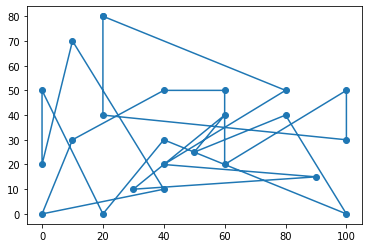


20. popülasyondaki en iyi çözüm: 
    0  1  2   3  4  5   6  7   8  ...  15  16  17  18  19  20  21  22  fitness
0  15  3  4  19  5  6  18  7  21  ...   1  14   2  17  11  10  13  12      459

[1 rows x 24 columns]


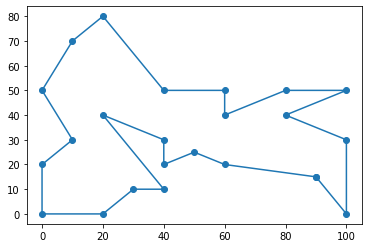


40. popülasyondaki en iyi çözüm: 
    0   1  2   3   4   5  6   7   8  ...  15  16  17  18  19  20  21  22  fitness
0  19  18  7  21  20  22  8  17  16  ...  11  13  12  15   3   4   5   6      408

[1 rows x 24 columns]


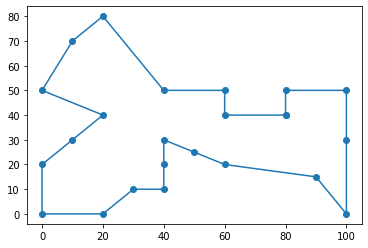


60. popülasyondaki en iyi çözüm: 
    0   1  2   3   4   5  6   7   8  ...  15  16  17  18  19  20  21  22  fitness
0  19  18  7  21  20  22  8  17  16  ...  11  13  12  15   3   4   5   6      408

[1 rows x 24 columns]


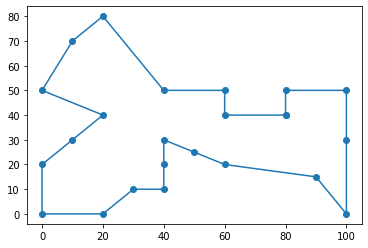


80. popülasyondaki en iyi çözüm: 
    0   1  2   3   4   5  6   7   8  ...  15  16  17  18  19  20  21  22  fitness
0  19  18  7  21  20  22  8  17  16  ...  11  13  12  15   3   4   5   6      408

[1 rows x 24 columns]


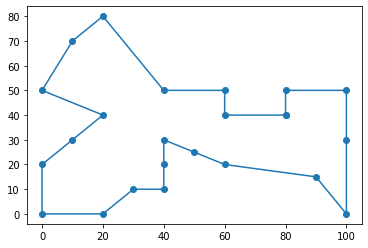


100. popülasyondaki en iyi çözüm: 
    0   1  2   3   4   5  6   7   8  ...  15  16  17  18  19  20  21  22  fitness
0  19  18  7  21  20  22  8  17  16  ...  11  13  12  15   3   4   5   6      408

[1 rows x 24 columns]


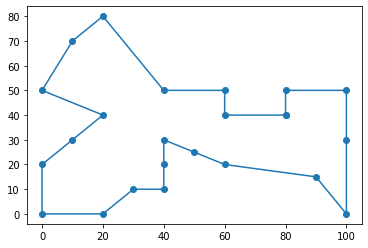


120. popülasyondaki en iyi çözüm: 
    0   1  2   3   4   5  6   7   8  ...  15  16  17  18  19  20  21  22  fitness
0  19  18  7  21  20  22  8  17  16  ...  11  13  12  15   3   4   5   6      408

[1 rows x 24 columns]


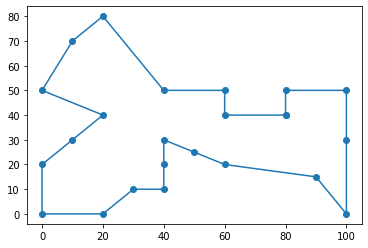


140. popülasyondaki en iyi çözüm: 
    0   1  2   3   4   5  6   7   8  ...  15  16  17  18  19  20  21  22  fitness
0  19  18  7  21  20  22  8  17  16  ...  11  13  12  15   3   4   5   6      408

[1 rows x 24 columns]


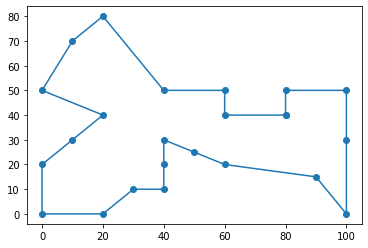


160. popülasyondaki en iyi çözüm: 
    0   1  2   3   4   5  6   7   8  ...  15  16  17  18  19  20  21  22  fitness
0  19  18  7  21  20  22  8  17  16  ...  11  13  12  15   3   4   5   6      408

[1 rows x 24 columns]


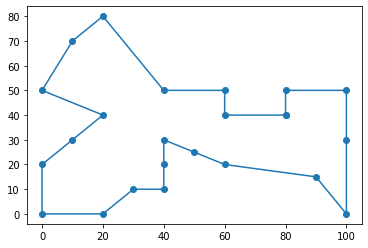


180. popülasyondaki en iyi çözüm: 
    0   1  2   3   4   5  6   7   8  ...  15  16  17  18  19  20  21  22  fitness
0  19  18  7  21  20  22  8  17  16  ...  11  13  12  15   3   4   5   6      408

[1 rows x 24 columns]


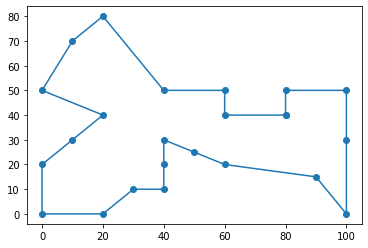


200. popülasyondaki en iyi çözüm: 
    0   1  2   3   4   5  6   7   8  ...  15  16  17  18  19  20  21  22  fitness
0  19  18  7  21  20  22  8  17  16  ...  11  13  12  15   3   4   5   6      408

[1 rows x 24 columns]


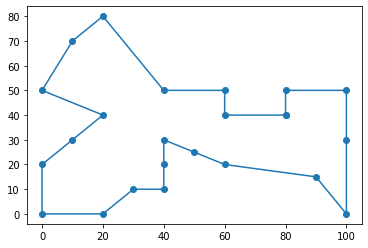


En iyi çözüm: 
    0   1  2   3   4   5  6   7   8  ...  15  16  17  18  19  20  21  22  fitness
0  19  18  7  21  20  22  8  17  16  ...  11  13  12  15   3   4   5   6      408

[1 rows x 24 columns]


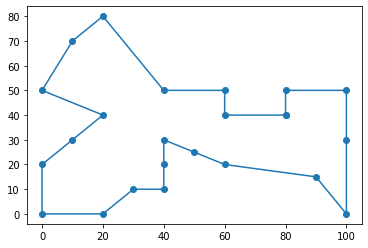

In [15]:
pop = createPopulation()
pop = fitness(pop)
print('Başlangıç ​​popülasyonunda çözüm')
print(pop.head(1))
plotSolution(pop)

for i in range(1, N+1):
    popc = crossover(pop)
    popc = fitness(popc)
    popm = mutation(popc)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popc, popm)
    popAll = sortPopulation(popAll)
    pop = elimination(popAll)

    if i%20 == 0: #Her 20 nesilde bir çöümleri ekrana yazdırıyoruz
      print()
      print(str(i)+'. popülasyondaki en iyi çözüm: ')
      print(pop.head(1))
      plotSolution(pop)

print('En iyi çözüm: ')
print(pop.head(1))
plotSolution(pop)